# Train-dev-test splits

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
os.chdir('..')

In [3]:
full_data = pd.read_parquet('data/processed/full_data_processed.parquet')
print(full_data.shape)
full_data.head()

(941009, 13)


,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


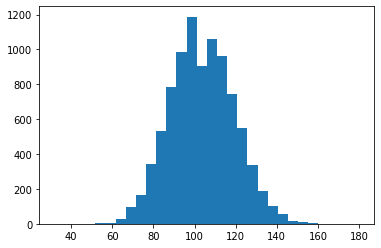

In [4]:
plt.hist(full_data.groupby('id_odsp').count()['country'], bins=30)
plt.show()

In [5]:
full_data['id_odsp'].nunique()

9074

In [6]:
# %Goalless games
goals_per_game = full_data.groupby('id_odsp').sum()['is_goal'].reset_index()
goals_per_game[goals_per_game['is_goal'] == 0].shape[0] / goals_per_game.shape[0]

0.07868635662331937

In [7]:
full_data.groupby('season').sum()

,sort_order,time,is_goal,fast_break,event_team_was_home
season,,,,,
2012,8476221,7417537,3670,975,78361
2013,8492886,7635917,3931,1072,79914
2014,9301375,8737946,4767,939,91682
2015,9540574,8995639,4652,758,94148
2016,9378443,8994537,4748,597,93320
2017,5492141,4952378,2678,247,50799


In [8]:
full_data['season'].value_counts() / full_data.shape[0]

2015    0.192296
2016    0.191286
2014    0.187488
2013    0.163734
2012    0.160330
2017    0.104866
Name: season, dtype: float64

### Use 2017 season as test set

In [9]:
test = full_data.copy()[full_data['season'] == 2017]

### Sample matches to create train and dev sets

In [10]:
train_and_dev = full_data.copy()[full_data['season'] != 2017]

In [11]:
unique_matches = train_and_dev[['id_odsp']].drop_duplicates().reset_index(drop=True)
unique_matches.head()

,id_odsp
0,UFot0hit/
1,Aw5DflLH/
2,bkjpaC6n/
3,CzPV312a/
4,GUOdmtII/


In [12]:
train_ids, dev_ids = train_test_split(unique_matches, test_size=10/90, random_state=42)

In [13]:
train_ids['set'] = 'train'
dev_ids['set'] = 'dev'

/Users/stevengeorge/opt/anaconda3/envs/football-commentary/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/stevengeorge/opt/anaconda3/envs/football-commentary/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
train_ids.head()

,id_odsp,set
7706,jepYaRdd/,train
7645,U9s0oPEP/,train
3064,hIahvOZ4/,train
5714,8YkaWhvH/,train
4952,EmbgQfWu/,train


In [15]:
set_df = train_ids.append(dev_ids)
set_df.reset_index(drop=True, inplace=True)
set_df.head()

,id_odsp,set
0,jepYaRdd/,train
1,U9s0oPEP/,train
2,hIahvOZ4/,train
3,8YkaWhvH/,train
4,EmbgQfWu/,train


In [16]:
print(train_and_dev.shape)
train_and_dev = train_and_dev.merge(set_df, on='id_odsp', how='inner')
print(train_and_dev.shape)

(842329, 13)
(842329, 14)


In [17]:
train = train_and_dev.copy()[train_and_dev['set'] == 'train'].drop('set', axis=1)
print(train.shape)

(749640, 13)


In [18]:
dev = train_and_dev.copy()[train_and_dev['set'] == 'dev'].drop('set', axis=1)
print(dev.shape)

(92689, 13)


In [19]:
assert full_data.shape[0] == train.shape[0] + dev.shape[0] + test.shape[0]

### Compare distributions

In [20]:
train.head()

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


#### Goal event proportions

In [30]:
train_prop = train['is_goal'].sum() / train.shape[0]
dev_prop = dev['is_goal'].sum() / dev.shape[0]
test_prop = test['is_goal'].sum() / test.shape[0]

print(f'Train: {train_prop}')
print(f'Dev: {dev_prop}')
print(f'Test: {test_prop}')

Train: 0.025771036764313537
Dev: 0.026421689736646204
Test: 0.027138224564248074


#### `fast_break` proportions

In [40]:
train_prop = train['fast_break'].sum() / train.shape[0]
dev_prop = dev['fast_break'].sum() / dev.shape[0]
test_prop = test['fast_break'].sum() / test.shape[0]

print(f'Train: {train_prop}')
print(f'Dev: {dev_prop}')
print(f'Test: {test_prop}')

Train: 0.005145136332106078
Dev: 0.005221763100260009
Test: 0.0025030401297122013


In [41]:
full_data['fast_break'].mean()

0.004875617555198728

In [43]:
full_data['fast_break'].sum(), full_data.shape[0]

(4588, 941009)

#### `event_team_was_home` proportions

In [44]:
train_prop = train['event_team_was_home'].sum() / train.shape[0]
dev_prop = dev['event_team_was_home'].sum() / dev.shape[0]
test_prop = test['event_team_was_home'].sum() / test.shape[0]

print(f'Train: {train_prop}')
print(f'Dev: {dev_prop}')
print(f'Test: {test_prop}')

Train: 0.5194266581292354
Dev: 0.5183139315344862
Test: 0.5147851641670045


#### `event_type` proportions

In [31]:
train.head()

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


In [32]:
plot_df = pd.concat(
    (
        train['event_type'].value_counts().reset_index().rename(columns={'index': 'event_type_train', 'event_type': 'train_count'}), 
        dev['event_type'].value_counts().reset_index().rename(columns={'index': 'event_type_dev', 'event_type': 'dev_count'}),
        test['event_type'].value_counts().reset_index().rename(columns={'index': 'event_type_test', 'event_type': 'test_count'})
    ),
    axis=1
)
plot_df

,event_type_train,train_count,event_type_dev,dev_count,event_type_test,test_count
0,Free kick won,189971,Free kick won,23300.0,Free kick won,24661
1,Foul,185763,Foul,22819.0,Foul,24343
2,Attempt,182178,Attempt,22708.0,Attempt,24249
3,Corner,72562,Corner,9077.0,Corner,9565
4,Substitution,41016,Substitution,5125.0,Substitution,5597
5,Offside,34855,Offside,4323.0,Offside,4298
6,Yellow card,31871,Yellow card,3946.0,Yellow card,4094
7,Hand ball,8658,Hand ball,1031.0,Hand ball,1041
8,Penalty conceded,1840,Penalty conceded,247.0,Penalty conceded,619
9,Red card,925,Red card,113.0,Red card,114


In [33]:
plot_df.drop(['event_type_dev', 'event_type_test'], axis=1, inplace=True)

In [34]:
plot_df.rename(columns={'event_type_train': 'event_type'}, inplace=True)

In [35]:
plot_df

,event_type,train_count,dev_count,test_count
0,Free kick won,189971,23300.0,24661
1,Foul,185763,22819.0,24343
2,Attempt,182178,22708.0,24249
3,Corner,72562,9077.0,9565
4,Substitution,41016,5125.0,5597
5,Offside,34855,4323.0,4298
6,Yellow card,31871,3946.0,4094
7,Hand ball,8658,1031.0,1041
8,Penalty conceded,1840,247.0,619
9,Red card,925,113.0,114


In [36]:
for count in ['train_count', 'dev_count', 'test_count']:
    plot_df[count] /= plot_df[count].sum()

In [37]:
plot_df.fillna(0, inplace=True)

In [38]:
plot_df

,event_type,train_count,dev_count,test_count
0,Free kick won,0.253416,0.251378,0.249909
1,Foul,0.247803,0.246189,0.246686
2,Attempt,0.243021,0.244991,0.245734
3,Corner,0.096796,0.097930,0.096929
4,Substitution,0.054714,0.055292,0.056719
5,Offside,0.046496,0.046640,0.043555
6,Yellow card,0.042515,0.042572,0.041488
7,Hand ball,0.011550,0.011123,0.010549
8,Penalty conceded,0.002455,0.002665,0.006273
9,Red card,0.001234,0.001219,0.001155


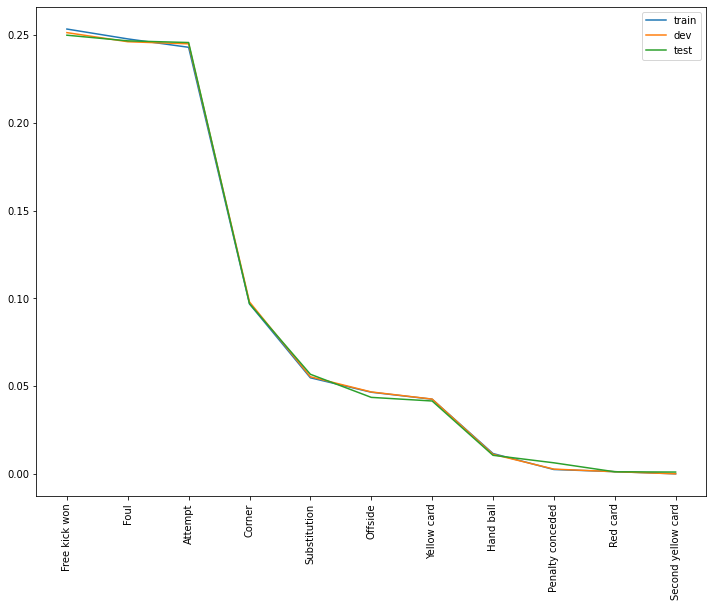

In [39]:
plt.figure(figsize=(12, 9))
plt.plot(plot_df['event_type'], plot_df['train_count'], label='train')
plt.plot(plot_df['event_type'], plot_df['dev_count'], label='dev')
plt.plot(plot_df['event_type'], plot_df['test_count'], label='test')
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### `assist_method` proportions

In [50]:
train.head()

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


In [51]:
plot_df = pd.concat(
    (
        train['assist_method'].value_counts().reset_index().rename(columns={'index': 'assist_method_train', 'assist_method': 'train_count'}), 
        dev['assist_method'].value_counts().reset_index().rename(columns={'index': 'assist_method_dev', 'assist_method': 'dev_count'}),
        test['assist_method'].value_counts().reset_index().rename(columns={'index': 'assist_method_test', 'assist_method': 'test_count'})
    ),
    axis=1
)
plot_df

,assist_method_train,train_count,assist_method_dev,dev_count,assist_method_test,test_count
0,None,616197,None,75984,None,80923
1,Pass,86770,Pass,10954,Pass,11810
2,Cross,34376,Cross,4243,Cross,4664
3,Headed pass,6232,Through ball,759,Headed pass,732
4,Through ball,6065,Headed pass,749,Through ball,551


In [53]:
plot_df.drop(['assist_method_train', 'assist_method_test'], axis=1, inplace=True)

In [54]:
plot_df.rename(columns={'assist_method_dev': 'assist_method'}, inplace=True)

In [55]:
plot_df

,train_count,assist_method,dev_count,test_count
0,616197,None,75984,80923
1,86770,Pass,10954,11810
2,34376,Cross,4243,4664
3,6232,Through ball,759,732
4,6065,Headed pass,749,551


In [56]:
for count in ['train_count', 'dev_count', 'test_count']:
    plot_df[count] /= plot_df[count].sum()

In [57]:
plot_df.fillna(0, inplace=True)

In [58]:
plot_df

,train_count,assist_method,dev_count,test_count
0,0.821991,None,0.819774,0.820055
1,0.115749,Pass,0.118180,0.119680
2,0.045857,Cross,0.045777,0.047264
3,0.008313,Through ball,0.008189,0.007418
4,0.008091,Headed pass,0.008081,0.005584


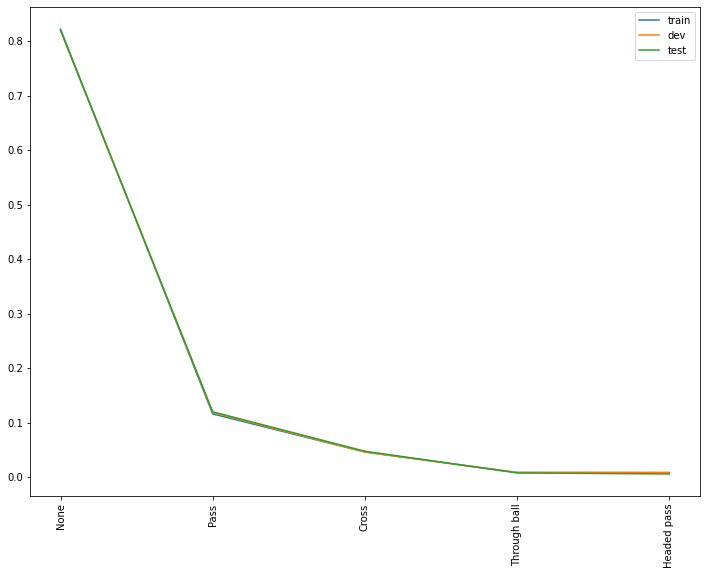

In [59]:
plt.figure(figsize=(12, 9))
plt.plot(plot_df['assist_method'], plot_df['train_count'], label='train')
plt.plot(plot_df['assist_method'], plot_df['dev_count'], label='dev')
plt.plot(plot_df['assist_method'], plot_df['test_count'], label='test')
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### `country` proportions

In [69]:
train.head()

,id_odsp,sort_order,time,text,event_type,event_team,opponent,is_goal,assist_method,fast_break,season,country,event_team_was_home
0,UFot0hit/,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Hamburg SV,Borussia Dortmund,0,Pass,0,2012,germany,0
1,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
2,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
3,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,Borussia Dortmund,Hamburg SV,0,None,0,2012,germany,1
4,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,Hamburg SV,Borussia Dortmund,0,None,0,2012,germany,0


In [70]:
plot_df = pd.concat(
    (
        train['country'].value_counts().reset_index().rename(columns={'index': 'country_train', 'country': 'train_count'}), 
        dev['country'].value_counts().reset_index().rename(columns={'index': 'country_dev', 'country': 'dev_count'}),
        test['country'].value_counts().reset_index().rename(columns={'index': 'country_test', 'country': 'test_count'})
    ),
    axis=1
)
plot_df

,country_train,train_count,country_dev,dev_count,country_test,test_count
0,italy,183634,france,21694,italy,22358
1,spain,172679,italy,21135,england,20733
2,france,166680,spain,19772,france,20072
3,germany,140276,germany,18272,spain,19492
4,england,86371,england,11816,germany,16025


In [71]:
plot_df.drop(['country_dev', 'country_test'], axis=1, inplace=True)

In [72]:
plot_df.rename(columns={'country_train': 'country'}, inplace=True)

In [73]:
plot_df

,country,train_count,dev_count,test_count
0,italy,183634,21694,22358
1,spain,172679,21135,20733
2,france,166680,19772,20072
3,germany,140276,18272,19492
4,england,86371,11816,16025


In [74]:
for count in ['train_count', 'dev_count', 'test_count']:
    plot_df[count] /= plot_df[count].sum()

In [75]:
plot_df.fillna(0, inplace=True)

In [76]:
plot_df

,country,train_count,dev_count,test_count
0,italy,0.244963,0.234052,0.226571
1,spain,0.230349,0.228021,0.210103
2,france,0.222347,0.213315,0.203405
3,germany,0.187124,0.197132,0.197527
4,england,0.115217,0.127480,0.162394


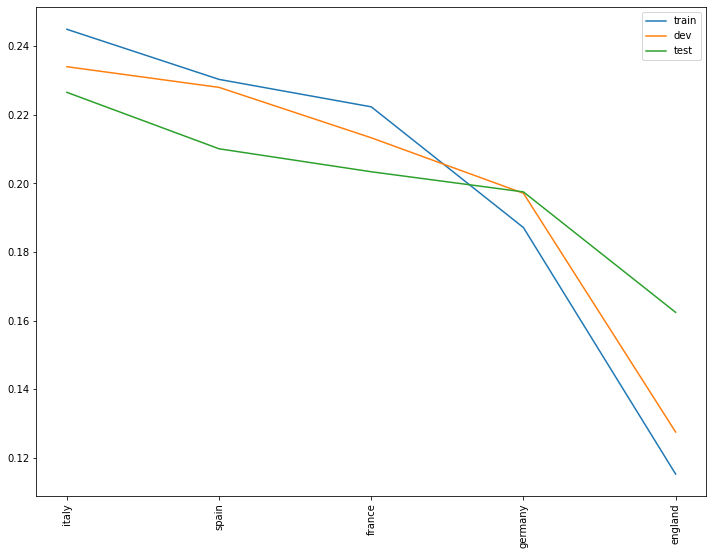

In [77]:
plt.figure(figsize=(12, 9))
plt.plot(plot_df['country'], plot_df['train_count'], label='train')
plt.plot(plot_df['country'], plot_df['dev_count'], label='dev')
plt.plot(plot_df['country'], plot_df['test_count'], label='test')
plt.legend()
plt.xticks(rotation=90)
plt.show()

## Save datasets

In [20]:
train.to_parquet('data/processed/train.parquet', index=False)
dev.to_parquet('data/processed/dev.parquet', index=False)
test.to_parquet('data/processed/test.parquet', index=False)